# Project on Random Forest and Decision Tree

In this project I'll be making two models using Random Forest and Decision Tree algorithms and try to which one performs better.

Sor this project I'll be using a dataset called `california_housing` from sklearn.

> California Housing dataset is a real world dataset about the California housing market. It contains 20,640 observations of 9 features and 1 target variable.

I chose this dataset so that you can experiment and get a feel for how Random Forest and Decision Tree algorithms work.

So let's get started.

- **Import Libraries(pandas, numpy, matplotlib, seaborn)**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**You can import the california_housing dataset from sklearn using the following code:**

In [8]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)
data = california.frame

- **Check the data information**

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- **Check the data head**

In [25]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In this data set there are 20640 observations of 9 features.

- `MedInc` is Median of Household Income.
- `HouseAge` is Median House Age.
- `AveRooms` is Average Number of Rooms.
- `AveBedrms` is Average Number of Bedrooms.
- `Population` is Population.
- `AveOccup` is Average Number people in Household.
- `Latitude` is Latitude.
- `Longitude` is Longitude.
- `MedHouseVal` is Median House Value.

All the features are continuous and the target variable is `MedHouseVal`.

So, let's do some exploratory data analysis.

# Exploratory Data Analysis

As I said before this is a real world dataset so we can just mode on to making the model but still suppose you don't know anything about the data, so how can you understand that the data is genuine or not?

There is a nice clue in this data set.

There are two columns called `Latitude` and `Longitude` which are the coordinates of the location of the house.

Other features can be randomly generated but `Latitude` and `Longitude` cannot be. If it is then if we make a scatter plot of `Latitude` and `Longitude` we can clearly see that these two columns are completely random.

So, first let's make a scatter plot of `Latitude` and `Longitude` to see if they are random.

<Axes: xlabel='Longitude', ylabel='Latitude'>

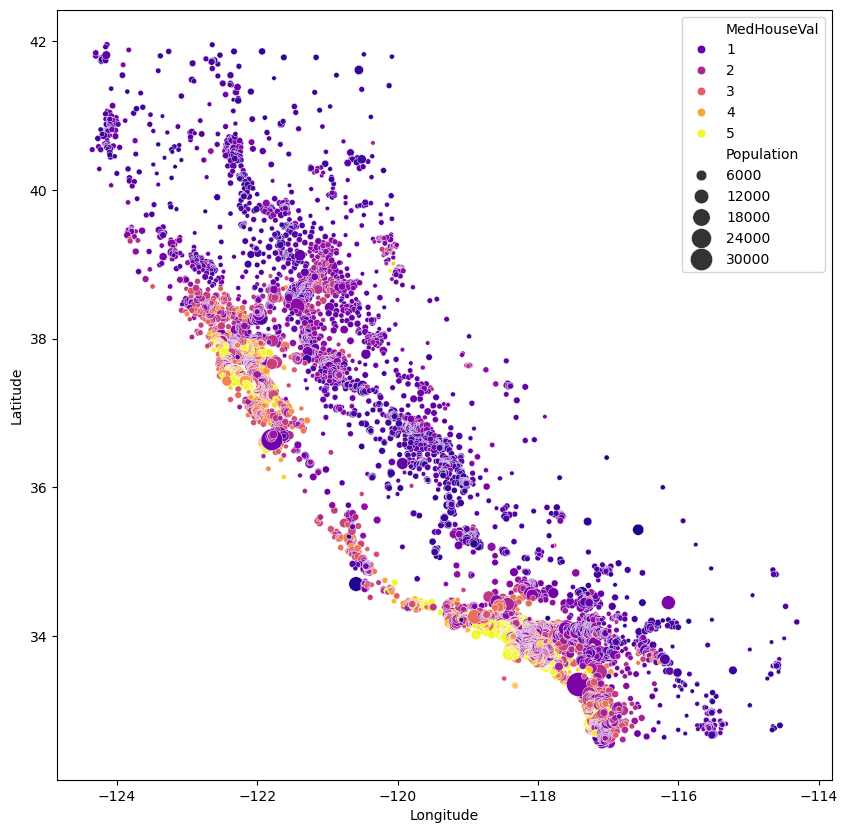

In [42]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    x="Longitude",
    y="Latitude",
    hue="MedHouseVal",
    palette="plasma",
    data=data,
    size="Population",
    sizes=(10, 300)
)

Ummm! This looks promising. But not that great so `let's try to plot the data on a map.`

This is a little advanced and will need some more extra libraries.

- `Geopandas` for working with geospatial data.
- `Contextily` for adding basemaps.
- `Shapely` for working with geometries.
- `Pyproj` for working with projections.

You can install them all at once using the following command:

```bash
pip install geopandas contextily shapely pyproj   
```

All of these libraries work together to plot the data on a map.

So, in the following code, I will plot a scatterplot with the house location and house price and with the population density on the map.

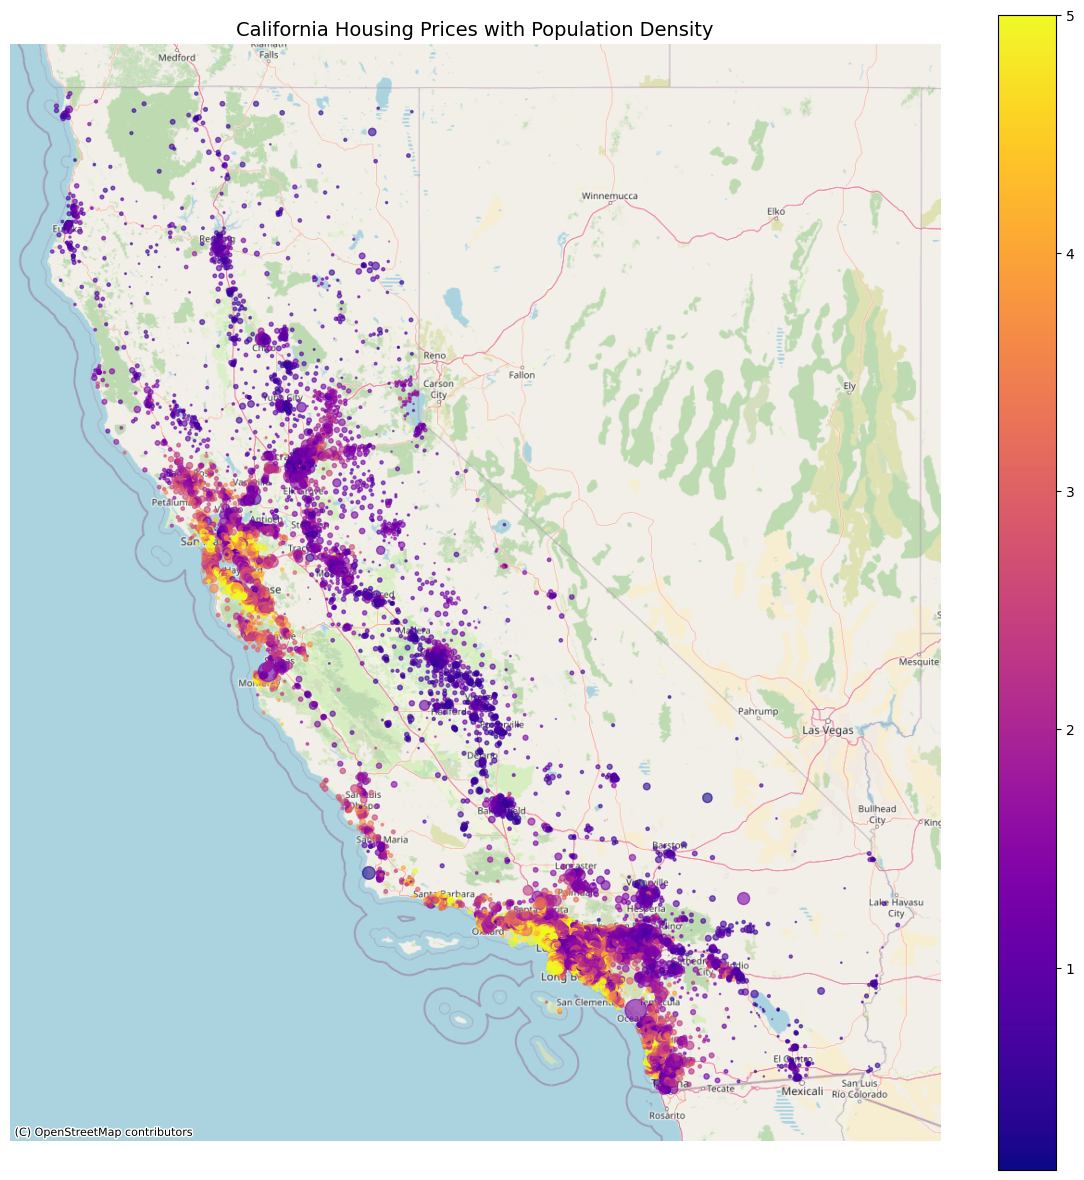

In [ ]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.Longitude, data.Latitude),
    crs="EPSG:4326"  # WGS84 (GPS coordinate system)
)

import contextily as ctx

gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(15, 15))

gdf.plot(
    ax=ax,
    column="MedHouseVal",
    cmap="plasma",
    markersize=gdf["Population"] / 150,
    alpha=0.6,
    legend=True
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
ax.set_title("California Housing Prices with Population Density", fontsize=14)

plt.show()

Now, I'll try my best to explain whats happening here with the help `AI`(chat gpt bois, I use it too!)

Absolutely! Let’s go **line by line** and conceptually break down what your code does. I’ll also point out a subtle issue I notice in your code.

** Import GeoPandas**

```python
import geopandas as gpd
```

* `geopandas` is an extension of pandas designed to handle **geospatial data**.
* It allows you to work with points, lines, polygons, and perform spatial operations like overlays, joins, and plotting on maps.

**Create a GeoDataFrame**

```python
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.Longitude, data.Latitude),
    crs="EPSG:4326"  # WGS84 (GPS coordinate system)
)
```

* `data` is presumably a **pandas DataFrame** with at least `Longitude`, `Latitude`, `MedHouseVal`, and `Population` columns.
* `gpd.points_from_xy(data.Longitude, data.Latitude)` converts your **longitude and latitude columns** into a `geometry` column of **Point objects**. This is what makes it geospatial.
* `crs="EPSG:4326"` sets the **coordinate reference system (CRS)**.

  * `EPSG:4326` = WGS84, which is the standard GPS coordinate system using **degrees of latitude and longitude**.
  * Important for geospatial calculations and plotting on base maps.

> **At this point:** You have a GeoDataFrame `gdf` with your original data + a geometry column representing each location as a point.


** Import Plotting Libraries**

```python
import matplotlib.pyplot as plt
import contextily as ctx
```

* `matplotlib.pyplot` is the standard Python plotting library.
* `contextily` lets you **add background map tiles** (like OpenStreetMap) under your plot. This is very handy for contextualizing points on real-world maps.

** Transform CRS**

```python
gdf = gdf.to_crs(epsg=3857)
```

* `to_crs()` **reprojects the GeoDataFrame** into a different coordinate system.
*  **EPSG:3857** (Web Mercator), which is compatible with web map tiles (like OpenStreetMap, Google Maps).
* Why reproject?

  * Base maps in `contextily` usually expect **Web Mercator** coordinates.
  * Reprojecting ensures your points **align correctly** with the base map tiles.

**Create a Figure**

```python
fig, ax = plt.subplots(figsize=(15, 15))
```

* Creates a **matplotlib figure** with a single axes object.
* `figsize=(15, 15)` makes a large square figure — useful when plotting many points or a big map.

### **6️⃣ Plot GeoDataFrame**

```python
gdf.plot(
    ax=ax,
    column="MedHouseVal",
    cmap="plasma",
    markersize=gdf["Population"] / 150,
    alpha=0.6,
    legend=True
)
```

Here’s what each argument does:

1. **`ax=ax`**

   * Plots on the axes we created, instead of a new one.

2. **`column="MedHouseVal"`**

   * Colors the points based on the median house value.
   * `matplotlib` automatically scales the colors according to the data in this column.

3. **`cmap="plasma"`**

   * Chooses the color scheme (plasma is a gradient from dark purple → yellow).
   * Brighter colors usually indicate higher values.

4. **`markersize=gdf["Population"] / 150`**

   * The size of each point corresponds to the population.
   * Dividing by 150 is just to **scale down the sizes** to make them visually reasonable.
   * This way, bigger populations are shown as larger points on the map.

5. **`alpha=0.6`**

   * Sets **transparency** so overlapping points don’t obscure each other completely.

6. **`legend=True`**

   * Adds a legend for the `MedHouseVal` coloring.

> **Result:** You now have a scatter plot over the map where:
>
> * Point **color** = median house value
> * Point **size** = population
> * Transparency lets overlapping points be visible

** Add a Basemap**

```python
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
```

* `contextily` adds a **raster map** from OpenStreetMap below your points.
* `source=ctx.providers.OpenStreetMap.Mapnik` specifies which tile provider to use.
* This allows you to **see actual geographic context** (like roads, rivers, cities).

> **Important:** The CRS must be Web Mercator (`EPSG:3857`) for the tiles to align correctly.

**Remove Axis and Add Title**

```python
ax.set_axis_off()
ax.set_title("California Housing Prices with Population Density", fontsize=14)
```

* `ax.set_axis_off()` hides the axis ticks and labels because they’re not very meaningful on maps.
* `ax.set_title()` gives the plot a descriptive title.


**Show Plot**

```python
plt.show()
```

* Renders the plot.

- These are the general steps:

1. Converts a normal DataFrame of California housing data into a **geospatial GeoDataFrame**.
2. Creates points for each location based on longitude/latitude.
3. Colors points by **median house value** and scales size by **population**.
4. Projects points to Web Mercator CRS for map tile compatibility.
5. Plots points on a **realistic map** using OpenStreetMap tiles.
6. Adds transparency and a legend to make the plot readable.
7. Titles the map and hides unnecessary axes.


## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [ ]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [ ]:
loans.info()

In [ ]:
loans.describe()

In [ ]:
loans.head()

# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [ ]:
loans.info()

## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [ ]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [ ]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [ ]:
final_data.info()

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [ ]:
predictions = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

**Show the Confusion Matrix for the predictions.**

In [ ]:
print(confusion_matrix(y_test,predictions))

**What performed better the random forest or the decision tree?**

In [ ]:
# Depends what metric you are trying to optimize for. 
# Notice the recall for each class for the models.
# Neither did very well, more feature engineering is needed.

# Great Job!